# Experiment 4 

##  Base Models

In [27]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from torchvision import models
from torchvision.models import resnet18
import torch.nn as nn
from sklearn.metrics import precision_score, classification_report
import timm

def get_nasnetlarge_base_model(num_classes=2):
    model = timm.create_model('nasnetalarge', pretrained=False)
    model.last_linear = nn.Linear(model.num_features, num_classes)
    return model.to(device)

def get_efficientnetb0_base_model(num_classes=2):
    model = timm.create_model('efficientnet_b0', pretrained=False)
    model.classifier = nn.Linear(model.num_features, num_classes)
    return model.to(device)

def get_resnet18_base_model(num_classes=2):
    model = models.resnet18(pretrained=False)
    model.fc = nn.Linear(model.fc.in_features, num_classes)
    return model.to(device)

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

best_model_path = "/teamspace/studios/victorious-coral-h1k6/base_resnet.pt"
new_dataset_image_path = "/teamspace/studios/gigantic-blue-2qvl/all_images.pt"
new_dataset_label_path = "/teamspace/studios/gigantic-blue-2qvl/all_labels.pt"

model = get_resnet18_base_model()
model.load_state_dict(torch.load(best_model_path))
model = model.to(device) 
model.eval()

images = torch.load(new_dataset_image_path).to(device)
labels = torch.load(new_dataset_label_path).to(device)

batch_size = 32
holdout_dataset = TensorDataset(images, labels)
holdout_loader = DataLoader(holdout_dataset, batch_size=batch_size, shuffle=False)

correct = 0
total = 0
all_labels = []
all_predictions = []

with torch.no_grad():
    for images_batch, labels_batch in holdout_loader:
        outputs = model(images_batch)
        _, predicted = torch.max(outputs, 1)
        total += labels_batch.size(0)
        correct += (predicted == labels_batch).sum().item()
        all_labels.extend(labels_batch.cpu().tolist())
        all_predictions.extend(predicted.cpu().tolist())

accuracy = correct / total * 100

weighted_precision = precision_score(all_labels, all_predictions, average='weighted')

print(f"Accuracy on the holdout dataset: {accuracy:.2f}%")
print(f"Weighted Precision on the holdout dataset: {weighted_precision:.4f}")

print("\nClassification Report:")
print(classification_report(all_labels, all_predictions, target_names=["Class 0", "Class 1"]))

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Accuracy on the holdout dataset: 64.71%
Weighted Precision on the holdout dataset: 0.6746

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.74      0.37      0.50       174
     Class 1       0.62      0.89      0.73       200

    accuracy                           0.65       374
   macro avg       0.68      0.63      0.61       374
weighted avg       0.67      0.65      0.62       374



In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

best_model_path = "/teamspace/studios/victorious-coral-h1k6/base_nesnet.pt"
new_dataset_image_path = "/teamspace/studios/gigantic-blue-2qvl/all_images.pt"
new_dataset_label_path = "/teamspace/studios/gigantic-blue-2qvl/all_labels.pt"

model = get_nasnetlarge_base_model()
model.load_state_dict(torch.load(best_model_path))
model = model.to(device) 
model.eval()

images = torch.load(new_dataset_image_path).to(device)
labels = torch.load(new_dataset_label_path).to(device)

batch_size = 32
holdout_dataset = TensorDataset(images, labels)
holdout_loader = DataLoader(holdout_dataset, batch_size=batch_size, shuffle=False)

correct = 0
total = 0
all_labels = []
all_predictions = []

with torch.no_grad():
    for images_batch, labels_batch in holdout_loader:
        outputs = model(images_batch)
        _, predicted = torch.max(outputs, 1)
        total += labels_batch.size(0)
        correct += (predicted == labels_batch).sum().item()
        all_labels.extend(labels_batch.cpu().tolist())
        all_predictions.extend(predicted.cpu().tolist())

accuracy = correct / total * 100

weighted_precision = precision_score(all_labels, all_predictions, average='weighted')

print(f"Accuracy on the holdout dataset: {accuracy:.2f}%")
print(f"Weighted Precision on the holdout dataset: {weighted_precision:.4f}")

print("\nClassification Report:")
print(classification_report(all_labels, all_predictions, target_names=["Class 0", "Class 1"]))

Accuracy on the holdout dataset: 56.95%
Weighted Precision on the holdout dataset: 0.7615

Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      0.07      0.14       174
     Class 1       0.55      1.00      0.71       200

    accuracy                           0.57       374
   macro avg       0.78      0.54      0.43       374
weighted avg       0.76      0.57      0.45       374



In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

best_model_path = "/teamspace/studios/victorious-coral-h1k6/base_effcientnet.pt"
new_dataset_image_path = "/teamspace/studios/gigantic-blue-2qvl/all_images.pt"
new_dataset_label_path = "/teamspace/studios/gigantic-blue-2qvl/all_labels.pt"

model = get_efficientnetb0_base_model()
model.load_state_dict(torch.load(best_model_path))
model = model.to(device) 
model.eval()

images = torch.load(new_dataset_image_path).to(device)
labels = torch.load(new_dataset_label_path).to(device)

batch_size = 32
holdout_dataset = TensorDataset(images, labels)
holdout_loader = DataLoader(holdout_dataset, batch_size=batch_size, shuffle=False)

correct = 0
total = 0
all_labels = []
all_predictions = []

with torch.no_grad():
    for images_batch, labels_batch in holdout_loader:
        outputs = model(images_batch)
        _, predicted = torch.max(outputs, 1)
        total += labels_batch.size(0)
        correct += (predicted == labels_batch).sum().item()
        all_labels.extend(labels_batch.cpu().tolist())
        all_predictions.extend(predicted.cpu().tolist())

accuracy = correct / total * 100

weighted_precision = precision_score(all_labels, all_predictions, average='weighted')

print(f"Accuracy on the holdout dataset: {accuracy:.2f}%")
print(f"Weighted Precision on the holdout dataset: {weighted_precision:.4f}")

print("\nClassification Report:")
print(classification_report(all_labels, all_predictions, target_names=["Class 0", "Class 1"]))

Accuracy on the holdout dataset: 55.61%
Weighted Precision on the holdout dataset: 0.7575

Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      0.05      0.09       174
     Class 1       0.55      1.00      0.71       200

    accuracy                           0.56       374
   macro avg       0.77      0.52      0.40       374
weighted avg       0.76      0.56      0.42       374



## Pretrained Customized

In [1]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

best_model_path = "/teamspace/studios/victorious-coral-h1k6/customized_resnet.pt"
new_dataset_image_path = "/teamspace/studios/gigantic-blue-2qvl/all_images.pt"
new_dataset_label_path = "/teamspace/studios/gigantic-blue-2qvl/all_labels.pt"

def get_model(num_classes=2):
    model = models.resnet18(pretrained=True)

    for param in model.parameters():
        param.requires_grad = False

    model.fc = nn.Sequential(
        nn.Linear(512, 256),
        nn.BatchNorm1d(256),
        nn.ReLU(),
        nn.Dropout(0.4),
        nn.Linear(256, 128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(128, num_classes),
    )
    return model

model = get_model(num_classes=2)
model.load_state_dict(torch.load(best_model_path))
model = model.to(device)
model.eval()  

images = torch.load(new_dataset_image_path).to(device)
labels = torch.load(new_dataset_label_path).to(device)

batch_size = 32
holdout_dataset = TensorDataset(images, labels)
holdout_loader = DataLoader(holdout_dataset, batch_size=batch_size, shuffle=False)

correct = 0
total = 0
all_labels = []
all_predictions = []

with torch.no_grad():
    for images_batch, labels_batch in holdout_loader:
        outputs = model(images_batch)
        _, predicted = torch.max(outputs, 1)
        total += labels_batch.size(0)
        correct += (predicted == labels_batch).sum().item()
        all_labels.extend(labels_batch.cpu().tolist())
        all_predictions.extend(predicted.cpu().tolist())

accuracy = correct / total * 100

weighted_precision = precision_score(all_labels, all_predictions, average='weighted')

print(f"Accuracy on the holdout dataset: {accuracy:.2f}%")
print(f"Weighted Precision on the holdout dataset: {weighted_precision:.4f}")

print("\nClassification Report:")
print(classification_report(all_labels, all_predictions, target_names=["Class 0", "Class 1"]))


NameError: name 'torch' is not defined

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

best_model_path = "/teamspace/studios/victorious-coral-h1k6/customized_nesnet2.pt"
new_dataset_image_path = "/teamspace/studios/gigantic-blue-2qvl/all_images.pt"
new_dataset_label_path = "/teamspace/studios/gigantic-blue-2qvl/all_labels.pt"

def get_nasnetlarge_model(num_classes=2):
    model = timm.create_model('nasnetalarge', pretrained=True)

    for name, param in model.named_parameters():
        if "cell_17" in name or "cell_18" in name or "cell_19" in name:
            param.requires_grad = True
        else:
            param.requires_grad = False

    model.last_linear = nn.Sequential(
        nn.Linear(model.num_features, 512),
        nn.BatchNorm1d(512),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(512, 256),
        nn.BatchNorm1d(256),
        nn.ReLU(),
        nn.Dropout(0.4),
        nn.Linear(256, num_classes),
    )

    return model.to(device)


model = get_nasnetlarge_model(num_classes=2)
try:
    model.load_state_dict(torch.load(best_model_path, map_location=device))
except RuntimeError as e:
    print(f"Error loading state dict: {e}")
    raise
model.eval()

images = torch.load(new_dataset_image_path).to(device)
labels = torch.load(new_dataset_label_path).to(device)

batch_size = 32
holdout_dataset = TensorDataset(images, labels)
holdout_loader = DataLoader(holdout_dataset, batch_size=batch_size, shuffle=False)

correct = 0
total = 0
all_labels = []
all_predictions = []
all_probs = []  

with torch.no_grad():
    for images_batch, labels_batch in holdout_loader:
        images_batch = images_batch.to(device)
        labels_batch = labels_batch.to(device)

        with torch.cuda.amp.autocast():
            outputs = model(images_batch)
            _, predicted = torch.max(outputs, 1)
            probabilities = torch.softmax(outputs, dim=1)[:, 1]  

        total += labels_batch.size(0)
        correct += (predicted == labels_batch).sum().item()
        all_labels.extend(labels_batch.cpu().tolist())
        all_predictions.extend(predicted.cpu().tolist())
        all_probs.extend(probabilities.cpu().tolist())

accuracy = correct / total * 100
weighted_precision = precision_score(all_labels, all_predictions, average='weighted')

print(f"Accuracy on the holdout dataset: {accuracy:.2f}%")
print(f"Weighted Precision on the holdout dataset: {weighted_precision:.4f}")

print("\nClassification Report:")
print(classification_report(all_labels, all_predictions, target_names=["Class 0", "Class 1"]))

Using device: cuda
Accuracy on the holdout dataset: 66.04%
Weighted Precision on the holdout dataset: 0.6767

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.72      0.44      0.54       174
     Class 1       0.64      0.85      0.73       200

    accuracy                           0.66       374
   macro avg       0.68      0.65      0.64       374
weighted avg       0.68      0.66      0.64       374



In [28]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def get_model_2(num_classes=5):
    model = models.efficientnet_b0(pretrained=True)

    for param in model.parameters():
        param.requires_grad = False

    model.classifier = nn.Sequential(
        nn.Linear(model.classifier[1].in_features, 256),
        nn.BatchNorm1d(256),
        nn.ReLU(),
        nn.Dropout(0.4),
        nn.Linear(256, 128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(128, num_classes),
    )

    return model

# Paths to model and dataset
best_model_path = "/teamspace/studios/victorious-coral-h1k6/pretrained_efficientnet.pt"
new_dataset_image_path = "/teamspace/studios/gigantic-blue-2qvl/all_images.pt"
new_dataset_label_path = "/teamspace/studios/gigantic-blue-2qvl/all_labels.pt"

# Load the model
model = get_model_2(num_classes=2)
model.load_state_dict(torch.load(best_model_path, map_location=device))
model = model.to(device)
model.eval()

images = torch.load(new_dataset_image_path).to(device)
labels = torch.load(new_dataset_label_path).to(device)

batch_size = 32
holdout_dataset = TensorDataset(images, labels)
holdout_loader = DataLoader(holdout_dataset, batch_size=batch_size, shuffle=False)

correct = 0
total = 0
all_labels = []
all_predictions = []

with torch.no_grad():
    for images_batch, labels_batch in holdout_loader:
        outputs = model(images_batch)
        _, predicted = torch.max(outputs, 1)
        total += labels_batch.size(0)
        correct += (predicted == labels_batch).sum().item()
        all_labels.extend(labels_batch.cpu().tolist())
        all_predictions.extend(predicted.cpu().tolist())

accuracy = correct / total * 100

weighted_precision = precision_score(all_labels, all_predictions, average='weighted')

print(f"Accuracy on the holdout dataset: {accuracy:.2f}%")
print(f"Weighted Precision on the holdout dataset: {weighted_precision:.4f}")

print("\nClassification Report:")
print(classification_report(all_labels, all_predictions, target_names=["Class 0", "Class 1"]))


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Accuracy on the holdout dataset: 64.97%
Weighted Precision on the holdout dataset: 0.6714

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.73      0.40      0.51       174
     Class 1       0.62      0.87      0.73       200

    accuracy                           0.65       374
   macro avg       0.67      0.63      0.62       374
weighted avg       0.67      0.65      0.63       374



## Finetuned Models

### lr=.01 optimizer=adam

#### Resnet

In [16]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

best_model_path = "/teamspace/studios/victorious-coral-h1k6/best_model_adam_lr0.01.pt"
new_dataset_image_path = "/teamspace/studios/gigantic-blue-2qvl/all_images.pt"
new_dataset_label_path = "/teamspace/studios/gigantic-blue-2qvl/all_labels.pt"

def get_model(num_classes=2):
    model = models.resnet18(pretrained=True)

    for param in model.parameters():
        param.requires_grad = False

    model.fc = nn.Sequential(
        nn.Linear(512, 256),
        nn.BatchNorm1d(256),
        nn.ReLU(),
        nn.Dropout(0.4),
        nn.Linear(256, 128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(128, num_classes),
    )
    return model

model = get_model(num_classes=2)
model.load_state_dict(torch.load(best_model_path))
model = model.to(device)
model.eval()  

images = torch.load(new_dataset_image_path).to(device)
labels = torch.load(new_dataset_label_path).to(device)

batch_size = 32
holdout_dataset = TensorDataset(images, labels)
holdout_loader = DataLoader(holdout_dataset, batch_size=batch_size, shuffle=False)

correct = 0
total = 0
all_labels = []
all_predictions = []

with torch.no_grad():
    for images_batch, labels_batch in holdout_loader:
        outputs = model(images_batch)
        _, predicted = torch.max(outputs, 1)
        total += labels_batch.size(0)
        correct += (predicted == labels_batch).sum().item()
        all_labels.extend(labels_batch.cpu().tolist())
        all_predictions.extend(predicted.cpu().tolist())

accuracy = correct / total * 100

weighted_precision = precision_score(all_labels, all_predictions, average='weighted')

print(f"Accuracy on the holdout dataset: {accuracy:.2f}%")
print(f"Weighted Precision on the holdout dataset: {weighted_precision:.4f}")

print("\nClassification Report:")
print(classification_report(all_labels, all_predictions, target_names=["Class 0", "Class 1"]))

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Accuracy on the holdout dataset: 65.24%
Weighted Precision on the holdout dataset: 0.6692

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.72      0.42      0.53       174
     Class 1       0.63      0.85      0.72       200

    accuracy                           0.65       374
   macro avg       0.67      0.64      0.63       374
weighted avg       0.67      0.65      0.63       374



#### NasNet

In [17]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

best_model_path = "/teamspace/studios/victorious-coral-h1k6/best_nasnet_adam_lr0.01.pt"
new_dataset_image_path = "/teamspace/studios/gigantic-blue-2qvl/all_images.pt"
new_dataset_label_path = "/teamspace/studios/gigantic-blue-2qvl/all_labels.pt"

def get_nasnetlarge_model(num_classes=2):
    model = timm.create_model('nasnetalarge', pretrained=True)

    for name, param in model.named_parameters():
        if "cell_17" in name or "cell_18" in name or "cell_19" in name:
            param.requires_grad = True
        else:
            param.requires_grad = False

    model.last_linear = nn.Sequential(
        nn.Linear(model.num_features, 512),
        nn.BatchNorm1d(512),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(512, 256),
        nn.BatchNorm1d(256),
        nn.ReLU(),
        nn.Dropout(0.4),
        nn.Linear(256, num_classes),
    )

    return model.to(device)


model = get_nasnetlarge_model(num_classes=2)
try:
    model.load_state_dict(torch.load(best_model_path, map_location=device))
except RuntimeError as e:
    print(f"Error loading state dict: {e}")
    raise
model.eval()

images = torch.load(new_dataset_image_path).to(device)
labels = torch.load(new_dataset_label_path).to(device)

batch_size = 32
holdout_dataset = TensorDataset(images, labels)
holdout_loader = DataLoader(holdout_dataset, batch_size=batch_size, shuffle=False)

correct = 0
total = 0
all_labels = []
all_predictions = []
all_probs = []  

with torch.no_grad():
    for images_batch, labels_batch in holdout_loader:
        images_batch = images_batch.to(device)
        labels_batch = labels_batch.to(device)

        with torch.cuda.amp.autocast():
            outputs = model(images_batch)
            _, predicted = torch.max(outputs, 1)
            probabilities = torch.softmax(outputs, dim=1)[:, 1]  

        total += labels_batch.size(0)
        correct += (predicted == labels_batch).sum().item()
        all_labels.extend(labels_batch.cpu().tolist())
        all_predictions.extend(predicted.cpu().tolist())
        all_probs.extend(probabilities.cpu().tolist())

accuracy = correct / total * 100
weighted_precision = precision_score(all_labels, all_predictions, average='weighted')

print(f"Accuracy on the holdout dataset: {accuracy:.2f}%")
print(f"Weighted Precision on the holdout dataset: {weighted_precision:.4f}")

print("\nClassification Report:")
print(classification_report(all_labels, all_predictions, target_names=["Class 0", "Class 1"]))

Using device: cuda
Accuracy on the holdout dataset: 70.32%
Weighted Precision on the holdout dataset: 0.7280

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.80      0.48      0.60       174
     Class 1       0.67      0.90      0.76       200

    accuracy                           0.70       374
   macro avg       0.73      0.69      0.68       374
weighted avg       0.73      0.70      0.69       374



#### EfficentNet

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

best_model_path = "/teamspace/studios/victorious-coral-h1k6/best_efficientnet_adam_lr0.01.pt"
new_dataset_image_path = "/teamspace/studios/gigantic-blue-2qvl/all_images.pt"
new_dataset_label_path = "/teamspace/studios/gigantic-blue-2qvl/all_labels.pt"

def get_model_2(num_classes=2):
    model = models.efficientnet_b0(pretrained=True)

    for name, param in model.named_parameters():
        if "features.6" in name or "features.7" in name or "features.8" in name:
            param.requires_grad = True
        else:
            param.requires_grad = False

    # fully connected layer
    model.classifier = nn.Sequential(
        nn.Linear(model.classifier[1].in_features, 512),
        nn.BatchNorm1d(512),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(512, 256),
        nn.BatchNorm1d(256),
        nn.ReLU(),
        nn.Dropout(0.4),
        nn.Linear(256, 128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(128, num_classes),
    )
    return model

model = get_model_2(num_classes=2)
model.load_state_dict(torch.load(best_model_path))
model = model.to(device)
model.eval()  

images = torch.load(new_dataset_image_path).to(device)
labels = torch.load(new_dataset_label_path).to(device)

batch_size = 32
holdout_dataset = TensorDataset(images, labels)
holdout_loader = DataLoader(holdout_dataset, batch_size=batch_size, shuffle=False)

correct = 0
total = 0
all_labels = []
all_predictions = []

with torch.no_grad():
    for images_batch, labels_batch in holdout_loader:
        outputs = model(images_batch)
        _, predicted = torch.max(outputs, 1)
        total += labels_batch.size(0)
        correct += (predicted == labels_batch).sum().item()
        all_labels.extend(labels_batch.cpu().tolist())
        all_predictions.extend(predicted.cpu().tolist())

accuracy = correct / total * 100

weighted_precision = precision_score(all_labels, all_predictions, average='weighted')

print(f"Accuracy on the holdout dataset: {accuracy:.2f}%")
print(f"Weighted Precision on the holdout dataset: {weighted_precision:.4f}")

print("\nClassification Report:")
print(classification_report(all_labels, all_predictions, target_names=["Class 0", "Class 1"]))

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Accuracy on the holdout dataset: 55.61%
Weighted Precision on the holdout dataset: 0.7575

Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      0.05      0.09       174
     Class 1       0.55      1.00      0.71       200

    accuracy                           0.56       374
   macro avg       0.77      0.52      0.40       374
weighted avg       0.76      0.56      0.42       374



### lr=.1 optimizer=adam

#### Resnet

In [19]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

best_model_path = "/teamspace/studios/victorious-coral-h1k6/best_model_adam_lr0.1.pt"
new_dataset_image_path = "/teamspace/studios/gigantic-blue-2qvl/all_images.pt"
new_dataset_label_path = "/teamspace/studios/gigantic-blue-2qvl/all_labels.pt"

def get_model(num_classes=2):
    model = models.resnet18(pretrained=True)

    for param in model.parameters():
        param.requires_grad = False

    model.fc = nn.Sequential(
        nn.Linear(512, 256),
        nn.BatchNorm1d(256),
        nn.ReLU(),
        nn.Dropout(0.4),
        nn.Linear(256, 128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(128, num_classes),
    )
    return model

model = get_model(num_classes=2)
model.load_state_dict(torch.load(best_model_path))
model = model.to(device)
model.eval()  

images = torch.load(new_dataset_image_path).to(device)
labels = torch.load(new_dataset_label_path).to(device)

batch_size = 32
holdout_dataset = TensorDataset(images, labels)
holdout_loader = DataLoader(holdout_dataset, batch_size=batch_size, shuffle=False)

correct = 0
total = 0
all_labels = []
all_predictions = []

with torch.no_grad():
    for images_batch, labels_batch in holdout_loader:
        outputs = model(images_batch)
        _, predicted = torch.max(outputs, 1)
        total += labels_batch.size(0)
        correct += (predicted == labels_batch).sum().item()
        all_labels.extend(labels_batch.cpu().tolist())
        all_predictions.extend(predicted.cpu().tolist())

accuracy = correct / total * 100

weighted_precision = precision_score(all_labels, all_predictions, average='weighted')

print(f"Accuracy on the holdout dataset: {accuracy:.2f}%")
print(f"Weighted Precision on the holdout dataset: {weighted_precision:.4f}")

print("\nClassification Report:")
print(classification_report(all_labels, all_predictions, target_names=["Class 0", "Class 1"]))

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Accuracy on the holdout dataset: 44.65%
Weighted Precision on the holdout dataset: 0.4291

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.45      0.87      0.59       174
     Class 1       0.41      0.08      0.13       200

    accuracy                           0.45       374
   macro avg       0.43      0.47      0.36       374
weighted avg       0.43      0.45      0.35       374



#### Nasnet

In [20]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

best_model_path = "/teamspace/studios/victorious-coral-h1k6/best_nasnet_adam_lr0.1.pt"
new_dataset_image_path = "/teamspace/studios/gigantic-blue-2qvl/all_images.pt"
new_dataset_label_path = "/teamspace/studios/gigantic-blue-2qvl/all_labels.pt"

def get_nasnetlarge_model(num_classes=2):
    model = timm.create_model('nasnetalarge', pretrained=True)

    for name, param in model.named_parameters():
        if "cell_17" in name or "cell_18" in name or "cell_19" in name:
            param.requires_grad = True
        else:
            param.requires_grad = False

    model.last_linear = nn.Sequential(
        nn.Linear(model.num_features, 512),
        nn.BatchNorm1d(512),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(512, 256),
        nn.BatchNorm1d(256),
        nn.ReLU(),
        nn.Dropout(0.4),
        nn.Linear(256, num_classes),
    )

    return model.to(device)


model = get_nasnetlarge_model(num_classes=2)
try:
    model.load_state_dict(torch.load(best_model_path, map_location=device))
except RuntimeError as e:
    print(f"Error loading state dict: {e}")
    raise
model.eval()

images = torch.load(new_dataset_image_path).to(device)
labels = torch.load(new_dataset_label_path).to(device)

batch_size = 32
holdout_dataset = TensorDataset(images, labels)
holdout_loader = DataLoader(holdout_dataset, batch_size=batch_size, shuffle=False)

correct = 0
total = 0
all_labels = []
all_predictions = []
all_probs = []  

with torch.no_grad():
    for images_batch, labels_batch in holdout_loader:
        images_batch = images_batch.to(device)
        labels_batch = labels_batch.to(device)

        with torch.cuda.amp.autocast():
            outputs = model(images_batch)
            _, predicted = torch.max(outputs, 1)
            probabilities = torch.softmax(outputs, dim=1)[:, 1]  

        total += labels_batch.size(0)
        correct += (predicted == labels_batch).sum().item()
        all_labels.extend(labels_batch.cpu().tolist())
        all_predictions.extend(predicted.cpu().tolist())
        all_probs.extend(probabilities.cpu().tolist())

accuracy = correct / total * 100
weighted_precision = precision_score(all_labels, all_predictions, average='weighted')

print(f"Accuracy on the holdout dataset: {accuracy:.2f}%")
print(f"Weighted Precision on the holdout dataset: {weighted_precision:.4f}")

print("\nClassification Report:")
print(classification_report(all_labels, all_predictions, target_names=["Class 0", "Class 1"]))

Using device: cuda
Accuracy on the holdout dataset: 53.48%
Weighted Precision on the holdout dataset: 0.2860

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00       174
     Class 1       0.53      1.00      0.70       200

    accuracy                           0.53       374
   macro avg       0.27      0.50      0.35       374
weighted avg       0.29      0.53      0.37       374



/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resul

#### Efficenetnet

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

best_model_path = "/teamspace/studios/victorious-coral-h1k6/best_efficientnet_adam_lr0.1.pt"
new_dataset_image_path = "/teamspace/studios/gigantic-blue-2qvl/all_images.pt"
new_dataset_label_path = "/teamspace/studios/gigantic-blue-2qvl/all_labels.pt"

def get_model_2(num_classes=2):
    model = models.efficientnet_b0(pretrained=True)

    for name, param in model.named_parameters():
        if "features.6" in name or "features.7" in name or "features.8" in name:
            param.requires_grad = True
        else:
            param.requires_grad = False

    # fully connected layer
    model.classifier = nn.Sequential(
        nn.Linear(model.classifier[1].in_features, 512),
        nn.BatchNorm1d(512),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(512, 256),
        nn.BatchNorm1d(256),
        nn.ReLU(),
        nn.Dropout(0.4),
        nn.Linear(256, 128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(128, num_classes),
    )
    return model

model = get_model_2(num_classes=2)
model.load_state_dict(torch.load(best_model_path))
model = model.to(device)
model.eval()  

images = torch.load(new_dataset_image_path).to(device)
labels = torch.load(new_dataset_label_path).to(device)

batch_size = 32
holdout_dataset = TensorDataset(images, labels)
holdout_loader = DataLoader(holdout_dataset, batch_size=batch_size, shuffle=False)

correct = 0
total = 0
all_labels = []
all_predictions = []

with torch.no_grad():
    for images_batch, labels_batch in holdout_loader:
        outputs = model(images_batch)
        _, predicted = torch.max(outputs, 1)
        total += labels_batch.size(0)
        correct += (predicted == labels_batch).sum().item()
        all_labels.extend(labels_batch.cpu().tolist())
        all_predictions.extend(predicted.cpu().tolist())

accuracy = correct / total * 100

weighted_precision = precision_score(all_labels, all_predictions, average='weighted')

print(f"Accuracy on the holdout dataset: {accuracy:.2f}%")
print(f"Weighted Precision on the holdout dataset: {weighted_precision:.4f}")

print("\nClassification Report:")
print(classification_report(all_labels, all_predictions, target_names=["Class 0", "Class 1"]))

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Accuracy on the holdout dataset: 46.52%
Weighted Precision on the holdout dataset: 0.2164

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.47      1.00      0.64       174
     Class 1       0.00      0.00      0.00       200

    accuracy                           0.47       374
   macro avg       0.23      0.50      0.32       374
weighted avg       0.22      0.47      0.30       374



/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resul

### lr=.2 optimizer=adam

#### Resnet

In [22]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

best_model_path = "/teamspace/studios/victorious-coral-h1k6/best_model_adam_lr0.2.pt"
new_dataset_image_path = "/teamspace/studios/gigantic-blue-2qvl/all_images.pt"
new_dataset_label_path = "/teamspace/studios/gigantic-blue-2qvl/all_labels.pt"

def get_model(num_classes=2):
    model = models.resnet18(pretrained=True)

    for param in model.parameters():
        param.requires_grad = False

    model.fc = nn.Sequential(
        nn.Linear(512, 256),
        nn.BatchNorm1d(256),
        nn.ReLU(),
        nn.Dropout(0.4),
        nn.Linear(256, 128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(128, num_classes),
    )
    return model

model = get_model(num_classes=2)
model.load_state_dict(torch.load(best_model_path))
model = model.to(device)
model.eval()  

images = torch.load(new_dataset_image_path).to(device)
labels = torch.load(new_dataset_label_path).to(device)

batch_size = 32
holdout_dataset = TensorDataset(images, labels)
holdout_loader = DataLoader(holdout_dataset, batch_size=batch_size, shuffle=False)

correct = 0
total = 0
all_labels = []
all_predictions = []

with torch.no_grad():
    for images_batch, labels_batch in holdout_loader:
        outputs = model(images_batch)
        _, predicted = torch.max(outputs, 1)
        total += labels_batch.size(0)
        correct += (predicted == labels_batch).sum().item()
        all_labels.extend(labels_batch.cpu().tolist())
        all_predictions.extend(predicted.cpu().tolist())

accuracy = correct / total * 100

weighted_precision = precision_score(all_labels, all_predictions, average='weighted')

print(f"Accuracy on the holdout dataset: {accuracy:.2f}%")
print(f"Weighted Precision on the holdout dataset: {weighted_precision:.4f}")

print("\nClassification Report:")
print(classification_report(all_labels, all_predictions, target_names=["Class 0", "Class 1"]))

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Accuracy on the holdout dataset: 49.20%
Weighted Precision on the holdout dataset: 0.5593

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.48      0.92      0.63       174
     Class 1       0.63      0.12      0.20       200

    accuracy                           0.49       374
   macro avg       0.55      0.52      0.41       374
weighted avg       0.56      0.49      0.40       374



#### Nasnet

In [23]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

best_model_path = "/teamspace/studios/victorious-coral-h1k6/best_nasnet_adam_lr0.2.pt"
new_dataset_image_path = "/teamspace/studios/gigantic-blue-2qvl/all_images.pt"
new_dataset_label_path = "/teamspace/studios/gigantic-blue-2qvl/all_labels.pt"

def get_nasnetlarge_model(num_classes=2):
    model = timm.create_model('nasnetalarge', pretrained=True)

    for name, param in model.named_parameters():
        if "cell_17" in name or "cell_18" in name or "cell_19" in name:
            param.requires_grad = True
        else:
            param.requires_grad = False

    model.last_linear = nn.Sequential(
        nn.Linear(model.num_features, 512),
        nn.BatchNorm1d(512),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(512, 256),
        nn.BatchNorm1d(256),
        nn.ReLU(),
        nn.Dropout(0.4),
        nn.Linear(256, num_classes),
    )

    return model.to(device)


model = get_nasnetlarge_model(num_classes=2)
try:
    model.load_state_dict(torch.load(best_model_path, map_location=device))
except RuntimeError as e:
    print(f"Error loading state dict: {e}")
    raise
model.eval()

images = torch.load(new_dataset_image_path).to(device)
labels = torch.load(new_dataset_label_path).to(device)

batch_size = 32
holdout_dataset = TensorDataset(images, labels)
holdout_loader = DataLoader(holdout_dataset, batch_size=batch_size, shuffle=False)

correct = 0
total = 0
all_labels = []
all_predictions = []
all_probs = []  

with torch.no_grad():
    for images_batch, labels_batch in holdout_loader:
        images_batch = images_batch.to(device)
        labels_batch = labels_batch.to(device)

        with torch.cuda.amp.autocast():
            outputs = model(images_batch)
            _, predicted = torch.max(outputs, 1)
            probabilities = torch.softmax(outputs, dim=1)[:, 1]  

        total += labels_batch.size(0)
        correct += (predicted == labels_batch).sum().item()
        all_labels.extend(labels_batch.cpu().tolist())
        all_predictions.extend(predicted.cpu().tolist())
        all_probs.extend(probabilities.cpu().tolist())

accuracy = correct / total * 100
weighted_precision = precision_score(all_labels, all_predictions, average='weighted')

print(f"Accuracy on the holdout dataset: {accuracy:.2f}%")
print(f"Weighted Precision on the holdout dataset: {weighted_precision:.4f}")

print("\nClassification Report:")
print(classification_report(all_labels, all_predictions, target_names=["Class 0", "Class 1"]))

Using device: cuda
Accuracy on the holdout dataset: 53.48%
Weighted Precision on the holdout dataset: 0.2860

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00       174
     Class 1       0.53      1.00      0.70       200

    accuracy                           0.53       374
   macro avg       0.27      0.50      0.35       374
weighted avg       0.29      0.53      0.37       374



/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resul

#### EfficenetNet

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

best_model_path = "/teamspace/studios/victorious-coral-h1k6/best_efficientnet_adam_lr0.2.pt"
new_dataset_image_path = "/teamspace/studios/gigantic-blue-2qvl/all_images.pt"
new_dataset_label_path = "/teamspace/studios/gigantic-blue-2qvl/all_labels.pt"

def get_model_2(num_classes=2):
    model = models.efficientnet_b0(pretrained=True)

    for name, param in model.named_parameters():
        if "features.6" in name or "features.7" in name or "features.8" in name:
            param.requires_grad = True
        else:
            param.requires_grad = False

    # fully connected layer
    model.classifier = nn.Sequential(
        nn.Linear(model.classifier[1].in_features, 512),
        nn.BatchNorm1d(512),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(512, 256),
        nn.BatchNorm1d(256),
        nn.ReLU(),
        nn.Dropout(0.4),
        nn.Linear(256, 128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(128, num_classes),
    )
    return model

model = get_model_2(num_classes=2)
model.load_state_dict(torch.load(best_model_path))
model = model.to(device)
model.eval()  

images = torch.load(new_dataset_image_path).to(device)
labels = torch.load(new_dataset_label_path).to(device)

batch_size = 32
holdout_dataset = TensorDataset(images, labels)
holdout_loader = DataLoader(holdout_dataset, batch_size=batch_size, shuffle=False)

correct = 0
total = 0
all_labels = []
all_predictions = []

with torch.no_grad():
    for images_batch, labels_batch in holdout_loader:
        outputs = model(images_batch)
        _, predicted = torch.max(outputs, 1)
        total += labels_batch.size(0)
        correct += (predicted == labels_batch).sum().item()
        all_labels.extend(labels_batch.cpu().tolist())
        all_predictions.extend(predicted.cpu().tolist())

accuracy = correct / total * 100

weighted_precision = precision_score(all_labels, all_predictions, average='weighted')

print(f"Accuracy on the holdout dataset: {accuracy:.2f}%")
print(f"Weighted Precision on the holdout dataset: {weighted_precision:.4f}")

print("\nClassification Report:")
print(classification_report(all_labels, all_predictions, target_names=["Class 0", "Class 1"]))

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Accuracy on the holdout dataset: 53.21%
Weighted Precision on the holdout dataset: 0.5270

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.50      0.40      0.44       174
     Class 1       0.55      0.65      0.60       200

    accuracy                           0.53       374
   macro avg       0.53      0.52      0.52       374
weighted avg       0.53      0.53      0.53       374



### lr=.01 optimizer=sgd

#### R

In [28]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

best_model_path = "/teamspace/studios/victorious-coral-h1k6/best_model_sgd_lr0.01.pt"
new_dataset_image_path = "/teamspace/studios/gigantic-blue-2qvl/all_images.pt"
new_dataset_label_path = "/teamspace/studios/gigantic-blue-2qvl/all_labels.pt"

def get_model(num_classes=2):
    model = models.resnet18(pretrained=True)

    for param in model.parameters():
        param.requires_grad = False

    model.fc = nn.Sequential(
        nn.Linear(512, 256),
        nn.BatchNorm1d(256),
        nn.ReLU(),
        nn.Dropout(0.4),
        nn.Linear(256, 128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(128, num_classes),
    )
    return model

model = get_model(num_classes=2)
model.load_state_dict(torch.load(best_model_path))
model = model.to(device)
model.eval()  

images = torch.load(new_dataset_image_path).to(device)
labels = torch.load(new_dataset_label_path).to(device)

batch_size = 32
holdout_dataset = TensorDataset(images, labels)
holdout_loader = DataLoader(holdout_dataset, batch_size=batch_size, shuffle=False)

correct = 0
total = 0
all_labels = []
all_predictions = []

with torch.no_grad():
    for images_batch, labels_batch in holdout_loader:
        outputs = model(images_batch)
        _, predicted = torch.max(outputs, 1)
        total += labels_batch.size(0)
        correct += (predicted == labels_batch).sum().item()
        all_labels.extend(labels_batch.cpu().tolist())
        all_predictions.extend(predicted.cpu().tolist())

accuracy = correct / total * 100

weighted_precision = precision_score(all_labels, all_predictions, average='weighted')

print(f"Accuracy on the holdout dataset: {accuracy:.2f}%")
print(f"Weighted Precision on the holdout dataset: {weighted_precision:.4f}")

print("\nClassification Report:")
print(classification_report(all_labels, all_predictions, target_names=["Class 0", "Class 1"]))

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Accuracy on the holdout dataset: 64.97%
Weighted Precision on the holdout dataset: 0.6487

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.64      0.57      0.60       174
     Class 1       0.66      0.71      0.69       200

    accuracy                           0.65       374
   macro avg       0.65      0.64      0.65       374
weighted avg       0.65      0.65      0.65       374



#### N

In [29]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

best_model_path = "/teamspace/studios/victorious-coral-h1k6/best_nasnet_sgd_lr0.01.pt"
new_dataset_image_path = "/teamspace/studios/gigantic-blue-2qvl/all_images.pt"
new_dataset_label_path = "/teamspace/studios/gigantic-blue-2qvl/all_labels.pt"

def get_nasnetlarge_model(num_classes=2):
    model = timm.create_model('nasnetalarge', pretrained=True)

    for name, param in model.named_parameters():
        if "cell_17" in name or "cell_18" in name or "cell_19" in name:
            param.requires_grad = True
        else:
            param.requires_grad = False

    model.last_linear = nn.Sequential(
        nn.Linear(model.num_features, 512),
        nn.BatchNorm1d(512),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(512, 256),
        nn.BatchNorm1d(256),
        nn.ReLU(),
        nn.Dropout(0.4),
        nn.Linear(256, num_classes),
    )

    return model.to(device)


model = get_nasnetlarge_model(num_classes=2)
try:
    model.load_state_dict(torch.load(best_model_path, map_location=device))
except RuntimeError as e:
    print(f"Error loading state dict: {e}")
    raise
model.eval()

images = torch.load(new_dataset_image_path).to(device)
labels = torch.load(new_dataset_label_path).to(device)

batch_size = 32
holdout_dataset = TensorDataset(images, labels)
holdout_loader = DataLoader(holdout_dataset, batch_size=batch_size, shuffle=False)

correct = 0
total = 0
all_labels = []
all_predictions = []
all_probs = []  

with torch.no_grad():
    for images_batch, labels_batch in holdout_loader:
        images_batch = images_batch.to(device)
        labels_batch = labels_batch.to(device)

        with torch.cuda.amp.autocast():
            outputs = model(images_batch)
            _, predicted = torch.max(outputs, 1)
            probabilities = torch.softmax(outputs, dim=1)[:, 1]  

        total += labels_batch.size(0)
        correct += (predicted == labels_batch).sum().item()
        all_labels.extend(labels_batch.cpu().tolist())
        all_predictions.extend(predicted.cpu().tolist())
        all_probs.extend(probabilities.cpu().tolist())

accuracy = correct / total * 100
weighted_precision = precision_score(all_labels, all_predictions, average='weighted')

print(f"Accuracy on the holdout dataset: {accuracy:.2f}%")
print(f"Weighted Precision on the holdout dataset: {weighted_precision:.4f}")

print("\nClassification Report:")
print(classification_report(all_labels, all_predictions, target_names=["Class 0", "Class 1"]))

Using device: cuda
Accuracy on the holdout dataset: 63.37%
Weighted Precision on the holdout dataset: 0.6342

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.64      0.49      0.56       174
     Class 1       0.63      0.76      0.69       200

    accuracy                           0.63       374
   macro avg       0.63      0.62      0.62       374
weighted avg       0.63      0.63      0.63       374



#### E

In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

best_model_path = "/teamspace/studios/victorious-coral-h1k6/best_efficientnet_sgd_lr0.01.pt"
new_dataset_image_path = "/teamspace/studios/gigantic-blue-2qvl/all_images.pt"
new_dataset_label_path = "/teamspace/studios/gigantic-blue-2qvl/all_labels.pt"

def get_model_2(num_classes=2):
    model = models.efficientnet_b0(pretrained=True)

    for name, param in model.named_parameters():
        if "features.6" in name or "features.7" in name or "features.8" in name:
            param.requires_grad = True
        else:
            param.requires_grad = False

    # fully connected layer
    model.classifier = nn.Sequential(
        nn.Linear(model.classifier[1].in_features, 512),
        nn.BatchNorm1d(512),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(512, 256),
        nn.BatchNorm1d(256),
        nn.ReLU(),
        nn.Dropout(0.4),
        nn.Linear(256, 128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(128, num_classes),
    )
    return model

model = get_model_2(num_classes=2)
model.load_state_dict(torch.load(best_model_path))
model = model.to(device)
model.eval()  

images = torch.load(new_dataset_image_path).to(device)
labels = torch.load(new_dataset_label_path).to(device)

batch_size = 32
holdout_dataset = TensorDataset(images, labels)
holdout_loader = DataLoader(holdout_dataset, batch_size=batch_size, shuffle=False)

correct = 0
total = 0
all_labels = []
all_predictions = []

with torch.no_grad():
    for images_batch, labels_batch in holdout_loader:
        outputs = model(images_batch)
        _, predicted = torch.max(outputs, 1)
        total += labels_batch.size(0)
        correct += (predicted == labels_batch).sum().item()
        all_labels.extend(labels_batch.cpu().tolist())
        all_predictions.extend(predicted.cpu().tolist())

accuracy = correct / total * 100

weighted_precision = precision_score(all_labels, all_predictions, average='weighted')

print(f"Accuracy on the holdout dataset: {accuracy:.2f}%")
print(f"Weighted Precision on the holdout dataset: {weighted_precision:.4f}")

print("\nClassification Report:")
print(classification_report(all_labels, all_predictions, target_names=["Class 0", "Class 1"]))

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Accuracy on the holdout dataset: 57.75%
Weighted Precision on the holdout dataset: 0.7011

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.86      0.11      0.19       174
     Class 1       0.56      0.98      0.71       200

    accuracy                           0.58       374
   macro avg       0.71      0.55      0.45       374
weighted avg       0.70      0.58      0.47       374



### lr=.1 optimizer=sgd

#### R

In [31]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

best_model_path = "/teamspace/studios/victorious-coral-h1k6/best_model_sgd_lr0.1.pt"
new_dataset_image_path = "/teamspace/studios/gigantic-blue-2qvl/all_images.pt"
new_dataset_label_path = "/teamspace/studios/gigantic-blue-2qvl/all_labels.pt"

def get_model(num_classes=2):
    model = models.resnet18(pretrained=True)

    for param in model.parameters():
        param.requires_grad = False

    model.fc = nn.Sequential(
        nn.Linear(512, 256),
        nn.BatchNorm1d(256),
        nn.ReLU(),
        nn.Dropout(0.4),
        nn.Linear(256, 128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(128, num_classes),
    )
    return model

model = get_model(num_classes=2)
model.load_state_dict(torch.load(best_model_path))
model = model.to(device)
model.eval()  

images = torch.load(new_dataset_image_path).to(device)
labels = torch.load(new_dataset_label_path).to(device)

batch_size = 32
holdout_dataset = TensorDataset(images, labels)
holdout_loader = DataLoader(holdout_dataset, batch_size=batch_size, shuffle=False)

correct = 0
total = 0
all_labels = []
all_predictions = []

with torch.no_grad():
    for images_batch, labels_batch in holdout_loader:
        outputs = model(images_batch)
        _, predicted = torch.max(outputs, 1)
        total += labels_batch.size(0)
        correct += (predicted == labels_batch).sum().item()
        all_labels.extend(labels_batch.cpu().tolist())
        all_predictions.extend(predicted.cpu().tolist())

accuracy = correct / total * 100

weighted_precision = precision_score(all_labels, all_predictions, average='weighted')

print(f"Accuracy on the holdout dataset: {accuracy:.2f}%")
print(f"Weighted Precision on the holdout dataset: {weighted_precision:.4f}")

print("\nClassification Report:")
print(classification_report(all_labels, all_predictions, target_names=["Class 0", "Class 1"]))

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Accuracy on the holdout dataset: 64.71%
Weighted Precision on the holdout dataset: 0.6462

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.64      0.56      0.60       174
     Class 1       0.65      0.72      0.69       200

    accuracy                           0.65       374
   macro avg       0.65      0.64      0.64       374
weighted avg       0.65      0.65      0.64       374



#### N

In [32]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

best_model_path = "/teamspace/studios/victorious-coral-h1k6/best_nasnet_sgd_lr0.1.pt"
new_dataset_image_path = "/teamspace/studios/gigantic-blue-2qvl/all_images.pt"
new_dataset_label_path = "/teamspace/studios/gigantic-blue-2qvl/all_labels.pt"

def get_nasnetlarge_model(num_classes=2):
    model = timm.create_model('nasnetalarge', pretrained=True)

    for name, param in model.named_parameters():
        if "cell_17" in name or "cell_18" in name or "cell_19" in name:
            param.requires_grad = True
        else:
            param.requires_grad = False

    model.last_linear = nn.Sequential(
        nn.Linear(model.num_features, 512),
        nn.BatchNorm1d(512),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(512, 256),
        nn.BatchNorm1d(256),
        nn.ReLU(),
        nn.Dropout(0.4),
        nn.Linear(256, num_classes),
    )

    return model.to(device)


model = get_nasnetlarge_model(num_classes=2)
try:
    model.load_state_dict(torch.load(best_model_path, map_location=device))
except RuntimeError as e:
    print(f"Error loading state dict: {e}")
    raise
model.eval()

images = torch.load(new_dataset_image_path).to(device)
labels = torch.load(new_dataset_label_path).to(device)

batch_size = 32
holdout_dataset = TensorDataset(images, labels)
holdout_loader = DataLoader(holdout_dataset, batch_size=batch_size, shuffle=False)

correct = 0
total = 0
all_labels = []
all_predictions = []
all_probs = []  

with torch.no_grad():
    for images_batch, labels_batch in holdout_loader:
        images_batch = images_batch.to(device)
        labels_batch = labels_batch.to(device)

        with torch.cuda.amp.autocast():
            outputs = model(images_batch)
            _, predicted = torch.max(outputs, 1)
            probabilities = torch.softmax(outputs, dim=1)[:, 1]  

        total += labels_batch.size(0)
        correct += (predicted == labels_batch).sum().item()
        all_labels.extend(labels_batch.cpu().tolist())
        all_predictions.extend(predicted.cpu().tolist())
        all_probs.extend(probabilities.cpu().tolist())

accuracy = correct / total * 100
weighted_precision = precision_score(all_labels, all_predictions, average='weighted')

print(f"Accuracy on the holdout dataset: {accuracy:.2f}%")
print(f"Weighted Precision on the holdout dataset: {weighted_precision:.4f}")

print("\nClassification Report:")
print(classification_report(all_labels, all_predictions, target_names=["Class 0", "Class 1"]))

Using device: cuda
Accuracy on the holdout dataset: 63.90%
Weighted Precision on the holdout dataset: 0.6389

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.64      0.52      0.57       174
     Class 1       0.64      0.74      0.69       200

    accuracy                           0.64       374
   macro avg       0.64      0.63      0.63       374
weighted avg       0.64      0.64      0.63       374



#### E

In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

best_model_path = "/teamspace/studios/victorious-coral-h1k6/best_efficientnet_sgd_lr0.1.pt"
new_dataset_image_path = "/teamspace/studios/gigantic-blue-2qvl/all_images.pt"
new_dataset_label_path = "/teamspace/studios/gigantic-blue-2qvl/all_labels.pt"

def get_model_2(num_classes=2):
    model = models.efficientnet_b0(pretrained=True)

    for name, param in model.named_parameters():
        if "features.6" in name or "features.7" in name or "features.8" in name:
            param.requires_grad = True
        else:
            param.requires_grad = False

    # fully connected layer
    model.classifier = nn.Sequential(
        nn.Linear(model.classifier[1].in_features, 512),
        nn.BatchNorm1d(512),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(512, 256),
        nn.BatchNorm1d(256),
        nn.ReLU(),
        nn.Dropout(0.4),
        nn.Linear(256, 128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(128, num_classes),
    )
    return model

model = get_model_2(num_classes=2)
model.load_state_dict(torch.load(best_model_path))
model = model.to(device)
model.eval()  

images = torch.load(new_dataset_image_path).to(device)
labels = torch.load(new_dataset_label_path).to(device)

batch_size = 32
holdout_dataset = TensorDataset(images, labels)
holdout_loader = DataLoader(holdout_dataset, batch_size=batch_size, shuffle=False)

correct = 0
total = 0
all_labels = []
all_predictions = []

with torch.no_grad():
    for images_batch, labels_batch in holdout_loader:
        outputs = model(images_batch)
        _, predicted = torch.max(outputs, 1)
        total += labels_batch.size(0)
        correct += (predicted == labels_batch).sum().item()
        all_labels.extend(labels_batch.cpu().tolist())
        all_predictions.extend(predicted.cpu().tolist())

accuracy = correct / total * 100

weighted_precision = precision_score(all_labels, all_predictions, average='weighted')

print(f"Accuracy on the holdout dataset: {accuracy:.2f}%")
print(f"Weighted Precision on the holdout dataset: {weighted_precision:.4f}")

print("\nClassification Report:")
print(classification_report(all_labels, all_predictions, target_names=["Class 0", "Class 1"]))

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Accuracy on the holdout dataset: 62.83%
Weighted Precision on the holdout dataset: 0.6817

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.78      0.28      0.41       174
     Class 1       0.60      0.93      0.73       200

    accuracy                           0.63       374
   macro avg       0.69      0.61      0.57       374
weighted avg       0.68      0.63      0.58       374



### lr=.2 optimizer=sgd

#### R

In [34]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

best_model_path = "/teamspace/studios/victorious-coral-h1k6/best_model_sgd_lr0.2.pt"
new_dataset_image_path = "/teamspace/studios/gigantic-blue-2qvl/all_images.pt"
new_dataset_label_path = "/teamspace/studios/gigantic-blue-2qvl/all_labels.pt"

def get_model(num_classes=2):
    model = models.resnet18(pretrained=True)

    for param in model.parameters():
        param.requires_grad = False

    model.fc = nn.Sequential(
        nn.Linear(512, 256),
        nn.BatchNorm1d(256),
        nn.ReLU(),
        nn.Dropout(0.4),
        nn.Linear(256, 128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(128, num_classes),
    )
    return model

model = get_model(num_classes=2)
model.load_state_dict(torch.load(best_model_path))
model = model.to(device)
model.eval()  

images = torch.load(new_dataset_image_path).to(device)
labels = torch.load(new_dataset_label_path).to(device)

batch_size = 32
holdout_dataset = TensorDataset(images, labels)
holdout_loader = DataLoader(holdout_dataset, batch_size=batch_size, shuffle=False)

correct = 0
total = 0
all_labels = []
all_predictions = []

with torch.no_grad():
    for images_batch, labels_batch in holdout_loader:
        outputs = model(images_batch)
        _, predicted = torch.max(outputs, 1)
        total += labels_batch.size(0)
        correct += (predicted == labels_batch).sum().item()
        all_labels.extend(labels_batch.cpu().tolist())
        all_predictions.extend(predicted.cpu().tolist())

accuracy = correct / total * 100

weighted_precision = precision_score(all_labels, all_predictions, average='weighted')

print(f"Accuracy on the holdout dataset: {accuracy:.2f}%")
print(f"Weighted Precision on the holdout dataset: {weighted_precision:.4f}")

print("\nClassification Report:")
print(classification_report(all_labels, all_predictions, target_names=["Class 0", "Class 1"]))

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Accuracy on the holdout dataset: 64.17%
Weighted Precision on the holdout dataset: 0.6454

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.60      0.67      0.63       174
     Class 1       0.68      0.62      0.65       200

    accuracy                           0.64       374
   macro avg       0.64      0.64      0.64       374
weighted avg       0.65      0.64      0.64       374



#### N

In [35]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

best_model_path = "/teamspace/studios/victorious-coral-h1k6/best_nasnet_sgd_lr0.2.pt"
new_dataset_image_path = "/teamspace/studios/gigantic-blue-2qvl/all_images.pt"
new_dataset_label_path = "/teamspace/studios/gigantic-blue-2qvl/all_labels.pt"

def get_nasnetlarge_model(num_classes=2):
    model = timm.create_model('nasnetalarge', pretrained=True)

    for name, param in model.named_parameters():
        if "cell_17" in name or "cell_18" in name or "cell_19" in name:
            param.requires_grad = True
        else:
            param.requires_grad = False

    model.last_linear = nn.Sequential(
        nn.Linear(model.num_features, 512),
        nn.BatchNorm1d(512),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(512, 256),
        nn.BatchNorm1d(256),
        nn.ReLU(),
        nn.Dropout(0.4),
        nn.Linear(256, num_classes),
    )

    return model.to(device)


model = get_nasnetlarge_model(num_classes=2)
try:
    model.load_state_dict(torch.load(best_model_path, map_location=device))
except RuntimeError as e:
    print(f"Error loading state dict: {e}")
    raise
model.eval()

images = torch.load(new_dataset_image_path).to(device)
labels = torch.load(new_dataset_label_path).to(device)

batch_size = 32
holdout_dataset = TensorDataset(images, labels)
holdout_loader = DataLoader(holdout_dataset, batch_size=batch_size, shuffle=False)

correct = 0
total = 0
all_labels = []
all_predictions = []
all_probs = []  

with torch.no_grad():
    for images_batch, labels_batch in holdout_loader:
        images_batch = images_batch.to(device)
        labels_batch = labels_batch.to(device)

        with torch.cuda.amp.autocast():
            outputs = model(images_batch)
            _, predicted = torch.max(outputs, 1)
            probabilities = torch.softmax(outputs, dim=1)[:, 1]  

        total += labels_batch.size(0)
        correct += (predicted == labels_batch).sum().item()
        all_labels.extend(labels_batch.cpu().tolist())
        all_predictions.extend(predicted.cpu().tolist())
        all_probs.extend(probabilities.cpu().tolist())

accuracy = correct / total * 100
weighted_precision = precision_score(all_labels, all_predictions, average='weighted')

print(f"Accuracy on the holdout dataset: {accuracy:.2f}%")
print(f"Weighted Precision on the holdout dataset: {weighted_precision:.4f}")

print("\nClassification Report:")
print(classification_report(all_labels, all_predictions, target_names=["Class 0", "Class 1"]))

Using device: cuda
Accuracy on the holdout dataset: 66.31%
Weighted Precision on the holdout dataset: 0.6623

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.65      0.59      0.62       174
     Class 1       0.67      0.73      0.70       200

    accuracy                           0.66       374
   macro avg       0.66      0.66      0.66       374
weighted avg       0.66      0.66      0.66       374



#### E

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

best_model_path = "/teamspace/studios/victorious-coral-h1k6/best_efficientnet_sgd_lr0.2.pt"
new_dataset_image_path = "/teamspace/studios/gigantic-blue-2qvl/all_images.pt"
new_dataset_label_path = "/teamspace/studios/gigantic-blue-2qvl/all_labels.pt"

def get_model_2(num_classes=2):
    model = models.efficientnet_b0(pretrained=True)

    for name, param in model.named_parameters():
        if "features.6" in name or "features.7" in name or "features.8" in name:
            param.requires_grad = True
        else:
            param.requires_grad = False

    # fully connected layer
    model.classifier = nn.Sequential(
        nn.Linear(model.classifier[1].in_features, 512),
        nn.BatchNorm1d(512),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(512, 256),
        nn.BatchNorm1d(256),
        nn.ReLU(),
        nn.Dropout(0.4),
        nn.Linear(256, 128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(128, num_classes),
    )
    return model

model = get_model_2(num_classes=2)
model.load_state_dict(torch.load(best_model_path))
model = model.to(device)
model.eval()  

images = torch.load(new_dataset_image_path).to(device)
labels = torch.load(new_dataset_label_path).to(device)

batch_size = 32
holdout_dataset = TensorDataset(images, labels)
holdout_loader = DataLoader(holdout_dataset, batch_size=batch_size, shuffle=False)

correct = 0
total = 0
all_labels = []
all_predictions = []

with torch.no_grad():
    for images_batch, labels_batch in holdout_loader:
        outputs = model(images_batch)
        _, predicted = torch.max(outputs, 1)
        total += labels_batch.size(0)
        correct += (predicted == labels_batch).sum().item()
        all_labels.extend(labels_batch.cpu().tolist())
        all_predictions.extend(predicted.cpu().tolist())

accuracy = correct / total * 100

weighted_precision = precision_score(all_labels, all_predictions, average='weighted')

print(f"Accuracy on the holdout dataset: {accuracy:.2f}%")
print(f"Weighted Precision on the holdout dataset: {weighted_precision:.4f}")

print("\nClassification Report:")
print(classification_report(all_labels, all_predictions, target_names=["Class 0", "Class 1"]))

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Accuracy on the holdout dataset: 59.63%
Weighted Precision on the holdout dataset: 0.6108

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.64      0.30      0.41       174
     Class 1       0.58      0.85      0.69       200

    accuracy                           0.60       374
   macro avg       0.61      0.58      0.55       374
weighted avg       0.61      0.60      0.56       374



### Extra Models

In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

best_model_path = "/teamspace/studios/victorious-coral-h1k6/best_efficientnet_sgd_lr0.001.pt"
new_dataset_image_path = "/teamspace/studios/gigantic-blue-2qvl/all_images.pt"
new_dataset_label_path = "/teamspace/studios/gigantic-blue-2qvl/all_labels.pt"

def get_model_2(num_classes=2):
    model = models.efficientnet_b0(pretrained=True)

    for name, param in model.named_parameters():
        if "features.6" in name or "features.7" in name or "features.8" in name:
            param.requires_grad = True
        else:
            param.requires_grad = False

    # fully connected layer
    model.classifier = nn.Sequential(
        nn.Linear(model.classifier[1].in_features, 512),
        nn.BatchNorm1d(512),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(512, 256),
        nn.BatchNorm1d(256),
        nn.ReLU(),
        nn.Dropout(0.4),
        nn.Linear(256, 128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(128, num_classes),
    )
    return model

model = get_model_2(num_classes=2)
model.load_state_dict(torch.load(best_model_path))
model = model.to(device)
model.eval()  

images = torch.load(new_dataset_image_path).to(device)
labels = torch.load(new_dataset_label_path).to(device)

batch_size = 32
holdout_dataset = TensorDataset(images, labels)
holdout_loader = DataLoader(holdout_dataset, batch_size=batch_size, shuffle=False)

correct = 0
total = 0
all_labels = []
all_predictions = []

with torch.no_grad():
    for images_batch, labels_batch in holdout_loader:
        outputs = model(images_batch)
        _, predicted = torch.max(outputs, 1)
        total += labels_batch.size(0)
        correct += (predicted == labels_batch).sum().item()
        all_labels.extend(labels_batch.cpu().tolist())
        all_predictions.extend(predicted.cpu().tolist())

accuracy = correct / total * 100

weighted_precision = precision_score(all_labels, all_predictions, average='weighted')

print(f"Accuracy on the holdout dataset: {accuracy:.2f}%")
print(f"Weighted Precision on the holdout dataset: {weighted_precision:.4f}")

print("\nClassification Report:")
print(classification_report(all_labels, all_predictions, target_names=["Class 0", "Class 1"]))

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Accuracy on the holdout dataset: 59.89%
Weighted Precision on the holdout dataset: 0.6167

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.65      0.29      0.40       174
     Class 1       0.58      0.86      0.70       200

    accuracy                           0.60       374
   macro avg       0.62      0.58      0.55       374
weighted avg       0.62      0.60      0.56       374



In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

best_model_path = "/teamspace/studios/victorious-coral-h1k6/best_efficientnet_adam_lr0.001.pt"
new_dataset_image_path = "/teamspace/studios/gigantic-blue-2qvl/all_images.pt"
new_dataset_label_path = "/teamspace/studios/gigantic-blue-2qvl/all_labels.pt"

def get_model_2(num_classes=2):
    model = models.efficientnet_b0(pretrained=True)

    for name, param in model.named_parameters():
        if "features.6" in name or "features.7" in name or "features.8" in name:
            param.requires_grad = True
        else:
            param.requires_grad = False

    # fully connected layer
    model.classifier = nn.Sequential(
        nn.Linear(model.classifier[1].in_features, 512),
        nn.BatchNorm1d(512),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(512, 256),
        nn.BatchNorm1d(256),
        nn.ReLU(),
        nn.Dropout(0.4),
        nn.Linear(256, 128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(128, num_classes),
    )
    return model

model = get_model_2(num_classes=2)
model.load_state_dict(torch.load(best_model_path))
model = model.to(device)
model.eval()  

images = torch.load(new_dataset_image_path).to(device)
labels = torch.load(new_dataset_label_path).to(device)

batch_size = 32
holdout_dataset = TensorDataset(images, labels)
holdout_loader = DataLoader(holdout_dataset, batch_size=batch_size, shuffle=False)

correct = 0
total = 0
all_labels = []
all_predictions = []

with torch.no_grad():
    for images_batch, labels_batch in holdout_loader:
        outputs = model(images_batch)
        _, predicted = torch.max(outputs, 1)
        total += labels_batch.size(0)
        correct += (predicted == labels_batch).sum().item()
        all_labels.extend(labels_batch.cpu().tolist())
        all_predictions.extend(predicted.cpu().tolist())

accuracy = correct / total * 100

weighted_precision = precision_score(all_labels, all_predictions, average='weighted')

print(f"Accuracy on the holdout dataset: {accuracy:.2f}%")
print(f"Weighted Precision on the holdout dataset: {weighted_precision:.4f}")

print("\nClassification Report:")
print(classification_report(all_labels, all_predictions, target_names=["Class 0", "Class 1"]))

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Accuracy on the holdout dataset: 64.17%
Weighted Precision on the holdout dataset: 0.6789

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.76      0.34      0.47       174
     Class 1       0.61      0.91      0.73       200

    accuracy                           0.64       374
   macro avg       0.68      0.62      0.60       374
weighted avg       0.68      0.64      0.61       374



| Model                          | Accuracy (%) | Weighted Precision |
|--------------------------------|--------------|---------------------|
| Base ResNet                    | 64.71        | 0.6746             |
| Base NASNet                    | 56.95        | 0.7615             |
| Base Efficient                 | 55.61        | 0.7575             |
| Pretrained ResNet              | 58.29        | 0.6399             |
| Pretrained NASNet              | 66.04        | 0.6767             |
| Pretrained Efficient           | 52.94        | 0.5324             |
| ResNet (lr=0.01, optimizer=adam) | 65.24        | 0.6692             |
| NASNet (lr=0.01, optimizer=adam) | 70.32        | 0.7280             |
| Efficient (lr=0.01, optimizer=adam) | 55.61        | 0.7575             |
| ResNet (lr=0.1, optimizer=adam)  | 44.65        | 0.4291             |
| NASNet (lr=0.1, optimizer=adam)  | 53.48        | 0.2860             |
| Efficient (lr=0.1, optimizer=adam) | 46.52        | 0.2164             |
| ResNet (lr=0.2, optimizer=adam)  | 49.20        | 0.5593             |
| NASNet (lr=0.2, optimizer=adam)  | 53.48        | 0.2860             |
| Efficient (lr=0.2, optimizer=adam) | 53.21        | 0.5270             |
| ResNet (lr=0.01, optimizer=sgd)  | 64.97        | 0.6487             |
| NASNet (lr=0.01, optimizer=sgd)  | 63.37        | 0.6342             |
| Efficient (lr=0.01, optimizer=sgd) | 57.75        | 0.7011             |
| ResNet (lr=0.1, optimizer=sgd)   | 64.71        | 0.6462             |
| NASNet (lr=0.1, optimizer=sgd)   | 63.90        | 0.6389             |
| Efficient (lr=0.1, optimizer=sgd) | 62.83        | 0.6817             |
| ResNet (lr=0.2, optimizer=sgd)   | 64.17        | 0.6454             |
| NASNet (lr=0.2, optimizer=sgd)   | 66.31        | 0.6623             |
| Efficient (lr=0.2, optimizer=sgd) | 59.63        | 0.6108             |
| ResNet18 (+KNN)                | 66.58        | 0.6705             |
| ResNet18 (+SVM)                | 65.24        | 0.6546             |
| EfficientNet (+KNN)            | 62.30        | 0.7185             |
| EfficientNet (+SVM)            | 61.76        | 0.7137             |
| NasNetLarge (+KNN)             | 64.17        | 0.6434             |
| NasNetLarge (+SVM)             | 64.71        | 0.6472             |


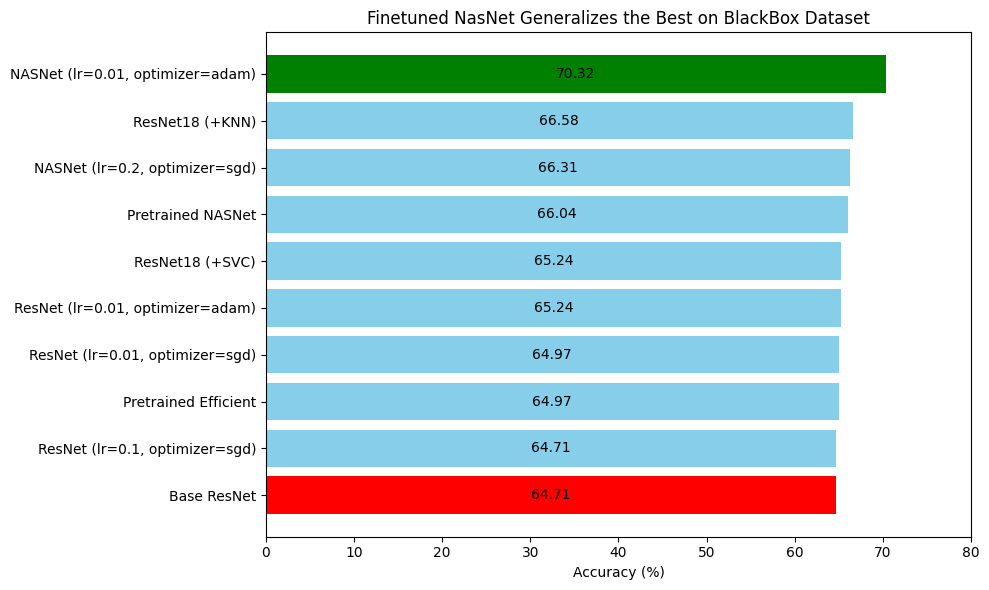

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for accuracy and models
data = {
    "Model": [
        "Base ResNet", "Base NASNet", "Base Efficient", "Pretrained ResNet",
        "Pretrained NASNet", "Pretrained Efficient", "ResNet (lr=0.01, optimizer=adam)",
        "NASNet (lr=0.01, optimizer=adam)", "Efficient (lr=0.01, optimizer=adam)",
        "ResNet (lr=0.1, optimizer=adam)", "NASNet (lr=0.1, optimizer=adam)",
        "Efficient (lr=0.1, optimizer=adam)", "ResNet (lr=0.2, optimizer=adam)",
        "NASNet (lr=0.2, optimizer=adam)", "Efficient (lr=0.2, optimizer=adam)",
        "ResNet (lr=0.01, optimizer=sgd)", "NASNet (lr=0.01, optimizer=sgd)",
        "Efficient (lr=0.01, optimizer=sgd)", "ResNet (lr=0.1, optimizer=sgd)",
        "NASNet (lr=0.1, optimizer=sgd)", "Efficient (lr=0.1, optimizer=sgd)",
        "ResNet (lr=0.2, optimizer=sgd)", "NASNet (lr=0.2, optimizer=sgd)",
        "Efficient (lr=0.2, optimizer=sgd)", "ResNet18 (+KNN)", "ResNet18 (+SVC)",
        "EfficientNet (+KNN)", "EfficientNet (+SVC)", "NasNetLarge (+KNN)",
        "NasNetLarge (+SVC)"
    ],
    "Accuracy (%)": [
        64.71, 56.95, 55.61, 58.29, 66.04, 64.97, 65.24, 70.32, 55.61, 44.65,
        53.48, 46.52, 49.20, 53.48, 53.21, 64.97, 63.37, 57.75, 64.71, 63.90,
        62.83, 64.17, 66.31, 59.63, 66.58, 65.24, 62.30, 61.76, 64.17, 64.71
    ]
}

# Convert to a DataFrame
df = pd.DataFrame(data)

# Sort the top 10 accuracies and include the baseline
top_10 = df.sort_values(by="Accuracy (%)", ascending=False).head(10)
baseline_model = df[df["Model"] == "Base ResNet"]
top_10_with_baseline = pd.concat([top_10, baseline_model]).drop_duplicates().sort_values(by="Accuracy (%)", ascending=False)

# Highlight the baseline model in red, top model in green, others in skyblue
colors = [
    'green' if acc == top_10_with_baseline["Accuracy (%)"].max() else
    'red' if model == "Base ResNet" else
    'skyblue'
    for model, acc in zip(top_10_with_baseline["Model"], top_10_with_baseline["Accuracy (%)"])
]

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_with_baseline["Model"], top_10_with_baseline["Accuracy (%)"], color=colors)

# Add accuracy values in black in the middle of each bar
for bar, accuracy in zip(bars, top_10_with_baseline["Accuracy (%)"]):
    plt.text(
        bar.get_width() / 2,
        bar.get_y() + bar.get_height() / 2,
        f"{accuracy:.2f}",
        ha="center", va="center", color="black"
    )

# Adjust plot details
plt.xlabel("Accuracy (%)")
plt.title("Finetuned NasNet Generalizes the Best on BlackBox Dataset")
plt.gca().invert_yaxis()  # Invert Y-axis to show the highest value at the top
plt.xlim(0, 80)  # Set X-axis limit to 80
plt.tight_layout()
plt.savefig("final.png")
plt.show()
